## Benin EDA

### Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Data Loading and Understanding

#### Data Import

In [2]:
#load the dataset
df =pd.read_csv('../data/benin-malanville.csv')
# Convert timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the time column as the index
df.set_index('Timestamp', inplace=True)

#show the first top 5 rows
print(df.head(5))
print("_________________________________________________________________________")
print(df.info())

                     GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-08-09 00:01:00      0.1  122.1      0.0  998         0            0.0   
2021-08-09 00:02:00      0.0    0.0      0.0  998         0            0.0   
2021-08-09 00:03:00      0.5  124.6      1.5  997         0            0.0   
2021-08-09 00:04:00      0.4  120.3      1.3  997         0            0.0   
2021-0

#### Data Understanding

In [3]:
#show the shape of the dataset
shape=df.shape
print("The shape of the dataset is: ",shape)
print("-----------------------------------------------------------------")
#show the columns of the dataset
columns=df.columns
print("The columns of the dataset are: ",columns)
print("-----------------------------------------------------------------")
#show the datatypes of the columns
dtypes=df.dtypes
print("The datatypes of the columns are: ",dtypes)
print("-----------------------------------------------------------------")

The shape of the dataset is:  (525600, 18)
-----------------------------------------------------------------
The columns of the dataset are:  Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Comments'],
      dtype='object')
-----------------------------------------------------------------
The datatypes of the columns are:  GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object
-----------------------------------------------------------------


### EDA analysis

#### Data Overview

In [4]:
#dataset information

print("The information of the dataset is: ")
print(df.info())

The information of the dataset is: 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TMod

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns in the dataset:")
print(numeric_cols)

Numeric columns in the dataset:
['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


#### Summary Statistics & Missing-Value Report

##### Summary Statistics

In [6]:
# Summary statistics of the dataset
summary = df.describe()
print("The summary statistics of the dataset are: ")
print(summary)
print("-----------------------------------------------------------------")
# random sample of the dataset
print("The random sample of the dataset is: ")
print(df.sample(5))

The summary statistics of the dataset are: 
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0

##### Missing-Value Report

In [7]:
#identifying the missing values with > 5% nulls
print(df.isna().sum()[df.isna().sum() > 0.05 * df.shape[0]])

Comments    525600
dtype: int64


#### Outlier Detection & Basic Cleaning

##### Looking for Outliers

In [8]:
# looking for outliers using  using z-score
selected_columns = ['GHI', 'DHI', 'DNI', 'ModA','ModB','WS', 'WSgust']
def detect_outliers(df, numeric_cols):
    # Calculate the z-scores of the numeric columns
    z_scores = np.abs(stats.zscore(df[numeric_cols]))
    threshold = 3
    outliers = (z_scores > threshold).any(axis=1)
    return outliers
outliers_z = detect_outliers(df, selected_columns)
print("The number of outliers in the dataset using z-score is: ", outliers_z.sum())

The number of outliers in the dataset using z-score is:  7740


##### Cleaning and Handling the dataset

In [9]:
# cleaning missing data
def clean_missing_data(df):
    # Drop columns with missing greater than 5% of their values
    missing_threshold = 0.05
    missing_cols = df.columns[df.isnull().mean() > missing_threshold]
    df_cleaned = df.drop(columns=missing_cols)
    return df_cleaned
df_cleaned = clean_missing_data(df)
print("The shape of the dataset after cleaning missing data is: ", df_cleaned.shape)

The shape of the dataset after cleaning missing data is:  (525600, 17)


In [10]:
# copy the cleaned dataset to the original dataset
df = df_cleaned

In [11]:
#imputing outliers
for col in selected_columns:
    df.loc[outliers_z, col] = df[col].median()
print("Outliers have been replaced with the median value of the respective column.")
print("===========================================")
print("Number of Outliers in the dataset after replacing outliers:")
outliers = detect_outliers(df, selected_columns)
print(outliers.sum())

Outliers have been replaced with the median value of the respective column.
Number of Outliers in the dataset after replacing outliers:
3635


In [12]:
#df after cleaning and imputing
print("The shape of the dataset after cleaning and imputing is: ", df.shape)
outliers_z = detect_outliers(df, selected_columns)
print("_")
print("Number of Outliers in the dataset after replacing outliers:")
outliers = detect_outliers(df, selected_columns)
print(outliers.sum())

The shape of the dataset after cleaning and imputing is:  (525600, 17)
_
Number of Outliers in the dataset after replacing outliers:
3635


##### Exporting the cleaned dataset


In [13]:
# cleaned DataFrame to data/benin-malanville_clean.csv
df.to_csv('../data/benin-malanville_clean.csv', index=False)
print("The cleaned dataset has been saved to data/benin-malanville_clean.csv")

The cleaned dataset has been saved to data/benin-malanville_clean.csv


#### Time Series Analysis

In [14]:
#Line charts of GHI, DNI, DHI, Tamb vs. Timestamp.
def plot_time_series(df, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns):
        color=np.random.rand(3,)
        plt.subplot(4, 1, i + 1)
        plt.plot(df.index, df[col], label=col,color=color)
        plt.title("Time Series of " + col)
        plt.xlabel('Timestamp')
        plt.ylabel(col)        
    plt.tight_layout()
    plt.show()

In [15]:
# histogram of GHI, DNI, DHI, Tamb 
def plot_histogram(df, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns):
        color = np.random.rand(3,)
        plt.subplot(2, 2, i + 1)
        sns.histplot(df[col], bins=30, kde=True, edgecolor='black', color=color)
        plt.title("Histogram of " + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

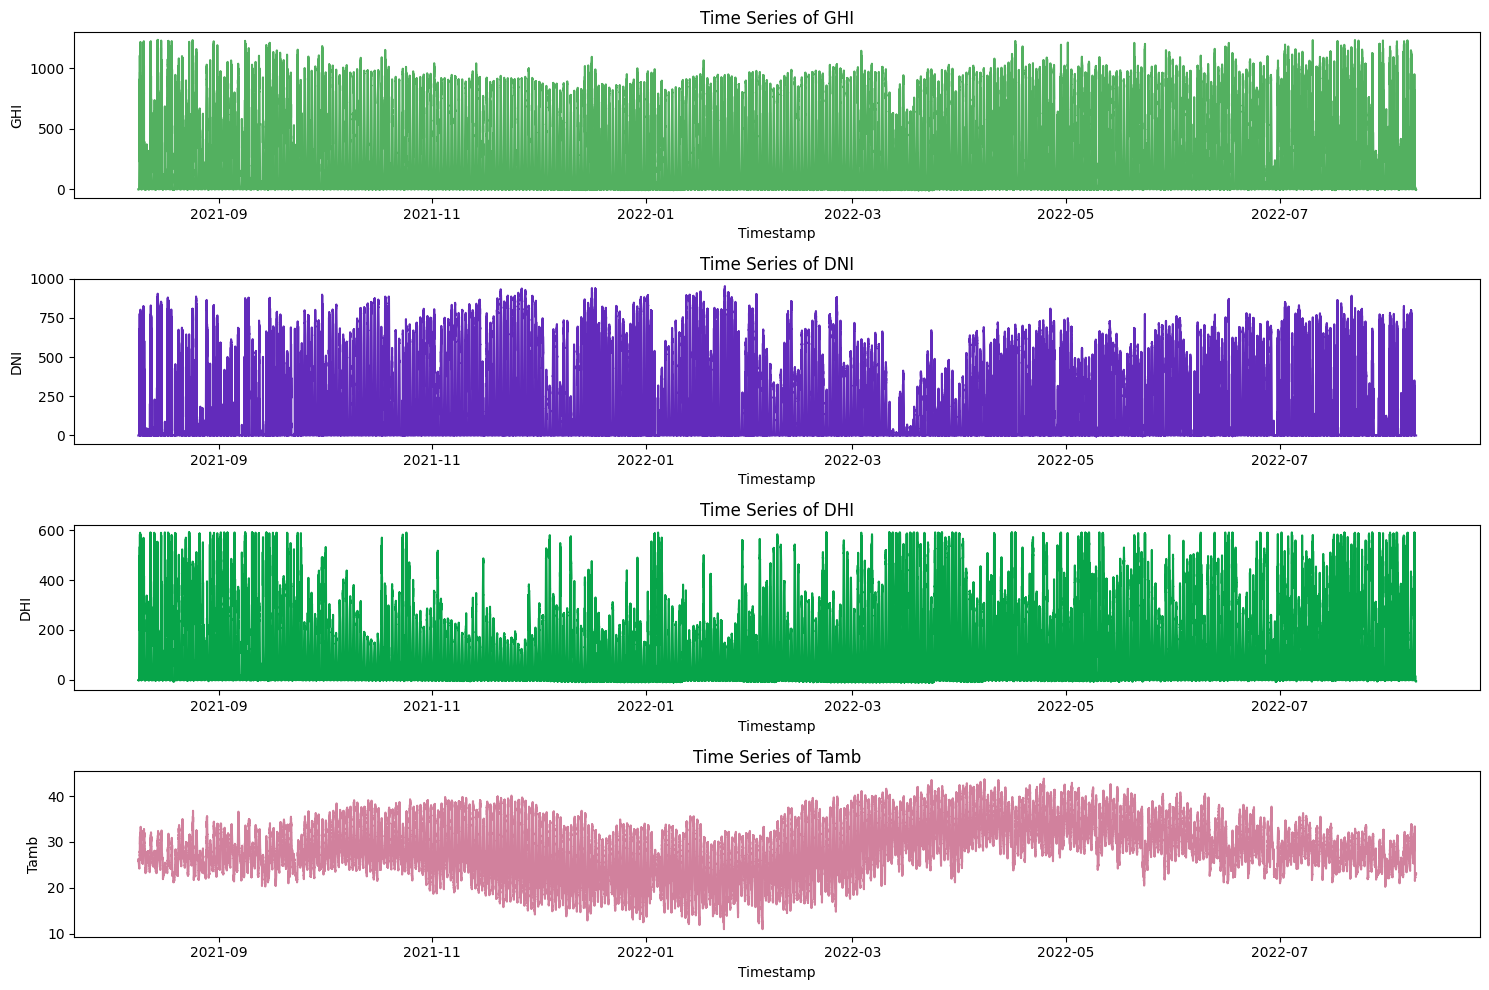

In [16]:
plot_time_series(df, ['GHI', 'DNI', 'DHI', 'Tamb'])

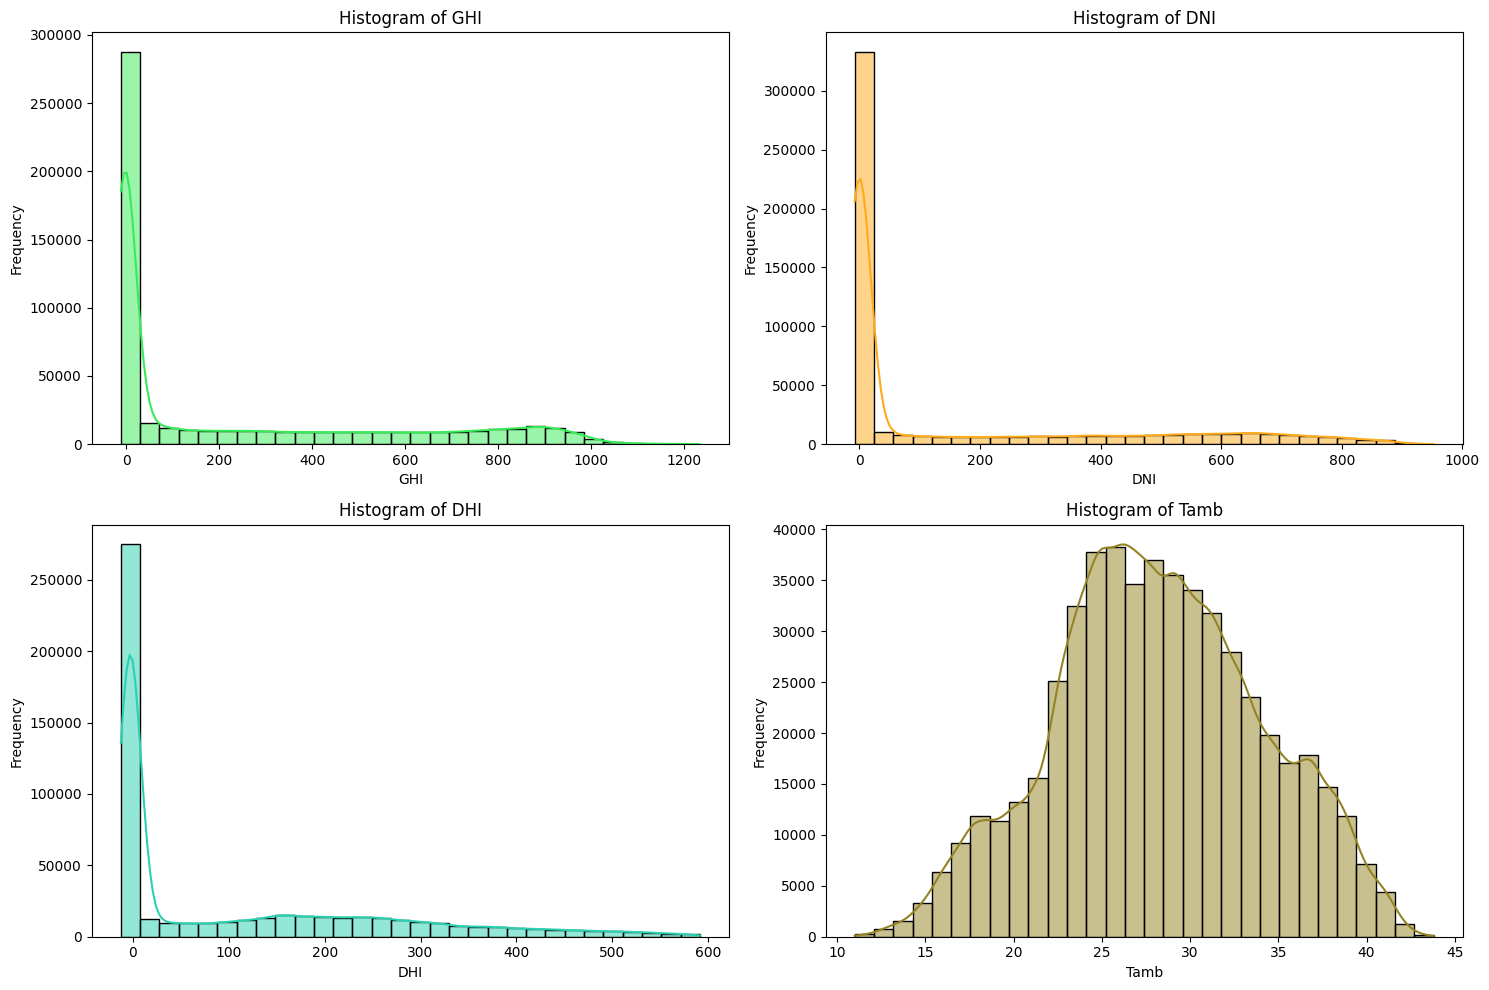

In [17]:
plot_histogram(df, ['GHI', 'DNI', 'DHI', 'Tamb'])

In [18]:
def plot_monthly_trends(df, columns):

    # Extract month from the index
    df['month'] = df.index.month
    
    # Monthly averages
    monthly_data = df.groupby('month')[columns].mean()
    
    # Plot
    plt.figure(figsize=(15, 5))
    monthly_data.plot(kind='line', marker='o')
    plt.title("Monthly Trends in Solar Radiation and Temperature")
    plt.xlabel("Month")
    plt.ylabel("Average Value")
    plt.grid(True)
    plt.show()

<Figure size 1500x500 with 0 Axes>

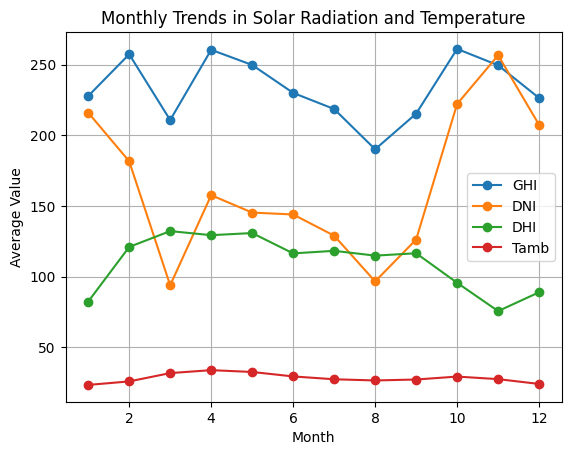

In [19]:
plot_monthly_trends(df, ['GHI', 'DNI', 'DHI', 'Tamb'])

In [20]:
# trends throughout day
def plot_daily_trends(df, columns):
    # Extract hour from the index
    df['hour'] = df.index.hour
    
    # Daily averages
    daily_data = df.groupby('hour')[columns].mean()
    
    # Plot
    plt.figure(figsize=(15, 5))
    daily_data.plot(kind='line', marker='o')
    plt.title("Daily Trends per Hour of Solar Radiation and Temperature")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Average Value")
    plt.grid(True)
    plt.show()


<Figure size 1500x500 with 0 Axes>

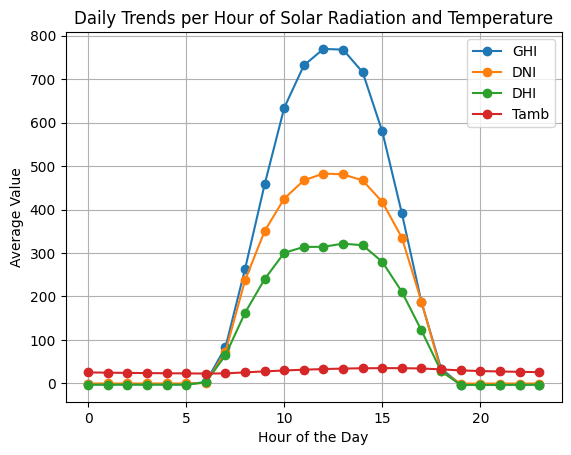

In [21]:
plot_daily_trends(df, ['GHI', 'DNI', 'DHI', 'Tamb'])

### Cleaning Impact

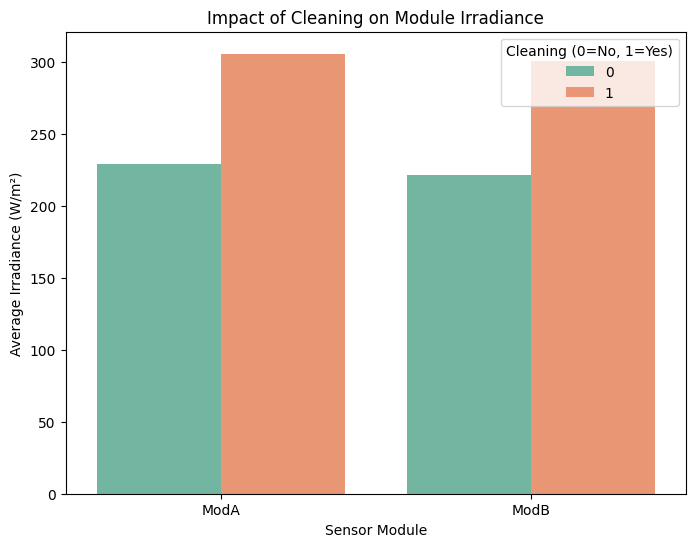

In [24]:
# Grouping by Cleaning flag and calculating mean of ModA and ModB
cleaning_flag= df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Melt to reshape the DataFrame for seaborn
cleaning_melted = cleaning_flag.melt(id_vars='Cleaning', value_vars=['ModA', 'ModB'], var_name='Module', value_name='Average Irradiance')

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=cleaning_melted, x='Module', y='Average Irradiance', hue='Cleaning', palette='Set2')
plt.title("Impact of Cleaning on Module Irradiance")
plt.ylabel("Average Irradiance (W/m²)")
plt.xlabel("Sensor Module")
plt.legend(title='Cleaning (0=No, 1=Yes)')
plt.show()

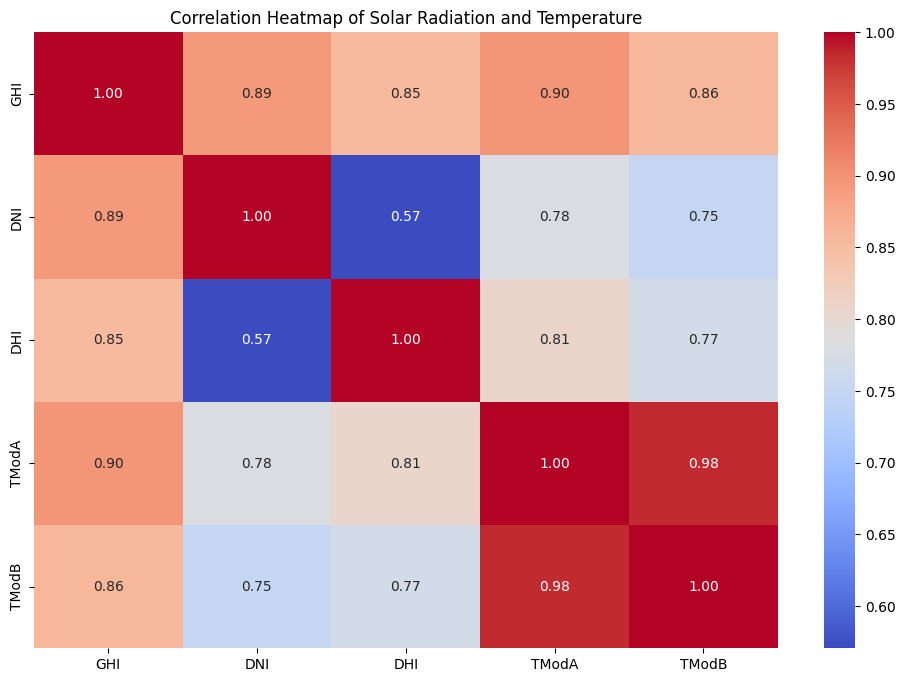

In [25]:
#Correlation & Relationship Analysis Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
plt.figure(figsize=(12, 8))
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Solar Radiation and Temperature")
plt.show()